In [1]:
using Pkg

Pkg.activate(".")
Pkg.add("Plots")
Pkg.add("DifferentialEquations")
Pkg.update()

using Plots

  Activating project at `~`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
   Installed StatsFuns ──────────────────────── v1.1.1
   Installed NonlinearSolve ─────────────────── v1.1.1
   Installed OffsetArrays ───────────────────── v1.12.8
   Installed GR_jll ─────────────────────────── v0.71.2+0
   Installed LoggingExtras ──────────────────── v1.0.0
   Installed DifferentialEquations ──────────── v7.6.0
   Installed RelocatableFolders ─────────────── v1.0.0
   Installed Measures ───────────────────────── v0.3.2
   Installed StaticArrays ───────────────────── v1.5.12
   Installed ColorSchemes ───────────────────── v3.20.0
   Installed PlotUtils ──────────────────────── v1.3.2
   Installed Polyester ──────────────────

In [70]:
# Setting up parameters (3 params)
k = 1.7 # rate of maximum population growth
M = 10000 # Carrying Capacity
r = 49 # (M/(y_0 - 1)) in the formula

# Packaging the parameters into one object, p::Vector..
p = [k, M, r] # set k = p[1], M = p[2], and r = p[3]

# Defining function according to the problem
f(P,p,t) = p[2]/(1 + (p[3] * exp( -p[1] * t )))

f (generic function with 1 method)

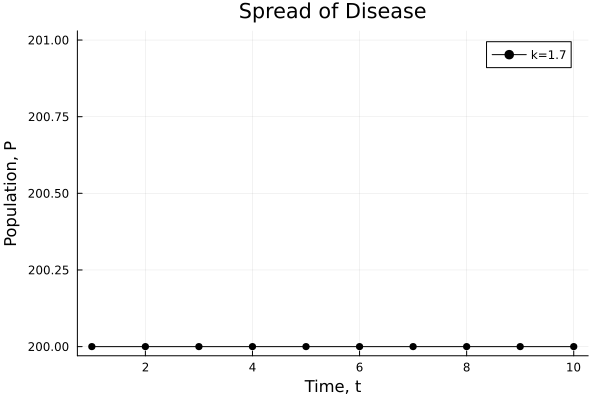

In [71]:
# Setting t = 0.0 since f(P,p,t) is independent of time
PRange = range(1, 10; length = 10)
dP_dt = [ f(P,p,0.0) for P in PRange ]

plt = plot( PRange, dP_dt # plot with basic feature
    ,linecolor=:black, marker=(:circle,:black)
    ,label="k=1.7"
)

# Enhancing resulting plot
plot!(plt
    ,title="Spread of Disease"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
)

In [72]:
struct MyProblem
    f::Function
    u0
    tspan
    p
end

In [73]:
P0 = 200
trange = (0.0, 10.0)
prob0 = MyProblem(f, P0, trange, p)

MyProblem(f, 200, (0.0, 10.0), [1.7, 10000.0, 49.0])

In [74]:
typeof(prob0)

MyProblem

In [75]:
@show prob0.p
@show prob0.u0;
@show prob0.tspan
@show prob0.f( 80.0, prob0.p, 0.0 );

prob0.p = [1.7, 10000.0, 49.0]
prob0.u0 = 200
prob0.tspan = (0.0, 10.0)
prob0.f(80.0, prob0.p, 0.0) = 200.0


In [76]:
struct MySolution
    t
    u
end

In [77]:
t = range(0.0,10.0; length=101)
soln0 = MySolution( t, sin.(t) )

MySolution(0.0:0.1:10.0, [0.0, 0.09983341664682815, 0.19866933079506122, 0.29552020666133955, 0.3894183423086505, 0.479425538604203, 0.5646424733950354, 0.644217687237691, 0.7173560908995228, 0.7833269096274834  …  0.3190983623493521, 0.22288991410024764, 0.1244544235070617, 0.024775425453357765, -0.0751511204618093, -0.17432678122297965, -0.27176062641094245, -0.3664791292519284, -0.4575358937753214, -0.5440211108893698])

In [78]:
soln0

MySolution(0.0:0.1:10.0, [0.0, 0.09983341664682815, 0.19866933079506122, 0.29552020666133955, 0.3894183423086505, 0.479425538604203, 0.5646424733950354, 0.644217687237691, 0.7173560908995228, 0.7833269096274834  …  0.3190983623493521, 0.22288991410024764, 0.1244544235070617, 0.024775425453357765, -0.0751511204618093, -0.17432678122297965, -0.27176062641094245, -0.3664791292519284, -0.4575358937753214, -0.5440211108893698])

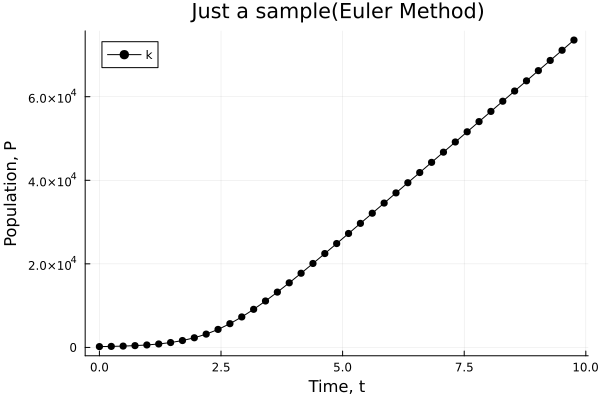

In [92]:
plt = plot( soln0.t, soln0.u
    ,lc=:black
    ,marker=(:circle,:black)
    ,label="k"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
    ,title="Just a sample(Euler Method)"
)

In [80]:
function solvePls( prob::MyProblem; npoints=100 )
    # Ensuring one-to-one correspondence..
    u = [ prob.u0 ] # first entry of solution
    t = [ prob.tspan[1] ] # first entry of time param
    dt = (prob.tspan[2] - prob.tspan[1])/(npoints+1) #ensures clean end
    
    # Initializing..
    uold = prob.u0
    told = prob.tspan[1]
    
    # Looping steps 2 and 3..
    for _ in 1:npoints
        # Computing Euler step..
        unew = uold + dt*prob.f( uold, prob.p, told )
        tnew = told + dt
        
        # Collecting values..
        u = vcat(u,unew)
        t = vcat(t,tnew)
        
        # Exchanging values..
        uold = unew
        told = tnew
    end
    
    return MySolution(t,u)
end

solvePls (generic function with 1 method)

In [81]:
soln0=solvePls(prob0; npoints=40)

MySolution([0.0, 0.24390243902439024, 0.4878048780487805, 0.7317073170731707, 0.975609756097561, 1.2195121951219512, 1.4634146341463414, 1.7073170731707317, 1.951219512195122, 2.1951219512195124  …  7.5609756097561025, 7.804878048780493, 8.048780487804883, 8.292682926829274, 8.536585365853664, 8.780487804878055, 9.024390243902445, 9.268292682926836, 9.512195121951226, 9.756097560975617], [200.0, 248.78048780487805, 321.87407567471683, 430.84639396751885, 592.1084845784471, 828.2088829439449, 1168.6869151310275, 1649.6130078058038, 2310.672288285762, 3189.067832467297  …  51602.00772293701, 54040.719445083385, 56479.53728345, 58918.42522533763, 61357.35947855379, 63796.3243251606, 66235.30938162889, 68674.30778854984, 71113.31501461849, 73552.3280664916])

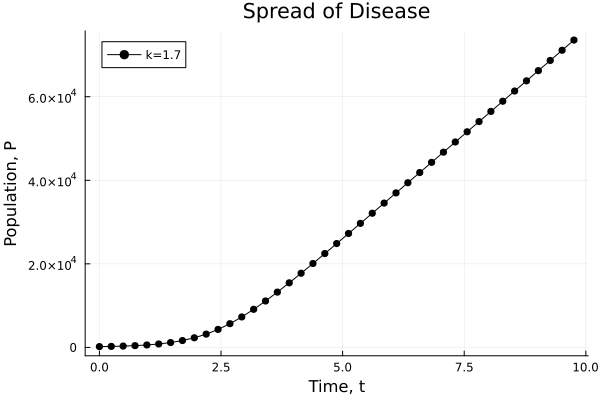

In [83]:
plt = plot( soln0.t, soln0.u
    ,lc=:black
    ,marker=(:circle,:black)
    ,label="k=1.7"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
    ,title="Spread of Disease"
)

In [86]:
using DifferentialEquations

P0 = 200
tspan = (0.0, 10.0)
prob = ODEProblem(f, P0, tspan, p)

ODEProblem with uType Int64 and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 200

In [87]:
soln = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 12-element Vector{Float64}:
  0.0
  0.09014795260796611
  0.3654710621501404
  0.7584425388798239
  1.2572807137570756
  1.9085822766279166
  2.5463947687458033
  3.7109366602368956
  4.734216742472654
  6.362270182893317
  8.520194614628817
 10.0
u: 12-element Vector{Float64}:
   200.0
   219.4522856789076
   300.4720741638321
   501.5973242277808
  1019.793507369282
  2557.6724264096524
  5583.2893913652415
 14800.1772765216
 24621.757554989937
 40816.60038899407
 62390.19258389726
 77188.11065013985

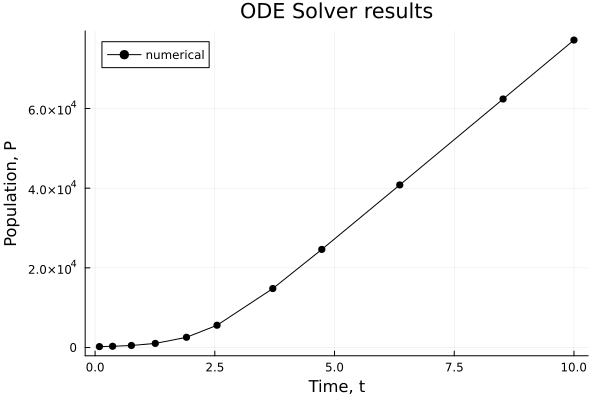

In [88]:
plt = plot(soln.t[2:end], soln.u[2:end]
    ,lc=:black,marker=(:circle,:black)
    ,label="numerical"
)

plot!(plt
    ,title="ODE Solver results"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
)

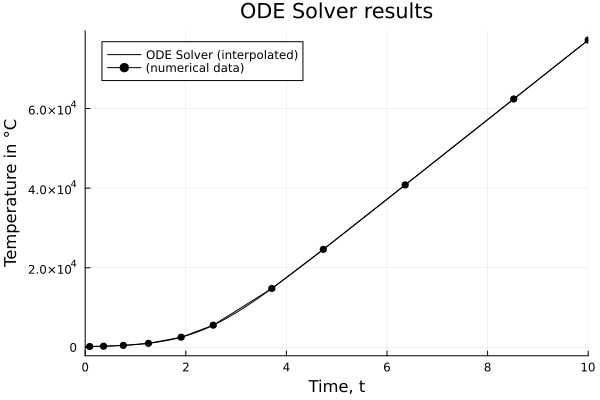

In [89]:
plt = plot(soln
    ,lc=:black
    ,label="ODE Solver (interpolated)"
)

plot!(plt, soln.t[2:end], soln.u[2:end]
    ,lc=:black,marker=(:circle,:black)
    ,label="(numerical data)"
)

plot!(plt
    ,title="ODE Solver results"
    ,xlabel="Time, t"
    ,ylabel="Temperature in °C"
)

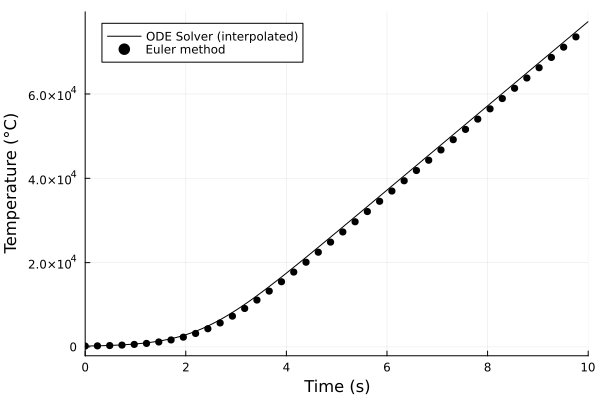

In [90]:
plt = plot(soln
    ,lc=:black
    ,label="ODE Solver (interpolated)"
)

scatter!(plt, soln0.t, soln0.u
    ,markershape=:circle,mc=:black
    ,label="Euler method"
)

plot!(plt
    ,xlabel="Time (s)"
    ,ylabel="Temperature (°C)"
#    ,yaxis=:log
)

In [94]:
Pkg.add("Profile")
Pkg.add("ProfileView")
Pkg.update()

using Profile
using ProfileView

   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
   Installed PolyesterWeave ──── v0.1.11
   Installed Polyester ───────── v0.6.20
   Installed DiffEqBase ──────── v6.113.0
   Installed LinearSolve ─────── v1.32.2
   Installed LoopVectorization ─ v0.12.143
  No Changes to `~/Project.toml`
    Updating `~/Manifest.toml`
  [2b5f629d] ↑ DiffEqBase v6.112.0 ⇒ v6.113.0
  [7ed4a6bd] ↑ LinearSolve v1.32.1 ⇒ v1.32.2
  [bdcacae8] ↑ LoopVectorization v0.12.142 ⇒ v0.12.143
  [f517fe37] ↑ Polyester v0.6.19 ⇒ v0.6.20
  [1d0040c9] ↓ PolyesterWeave v0.1.12 ⇒ v0.1.11
Precompiling project...
  ✓ PolyesterWeave
  ✓ Polyester
  ✓ FastBroadcast
  ✓ DiffEqBase
  ✓ DiffEqCallbacks
  ✓ JumpProcesses
  ✓ LoopVectorization
  ✓ BoundaryValueDiffEq
  ✓ DiffEqNoiseProcess
  ✓ SteadyStateDiffEq
  ✓ Sundials

In [96]:
@profile soln0 = solvePls(prob0; npoints=40)

MySolution([0.0, 0.24390243902439024, 0.4878048780487805, 0.7317073170731707, 0.975609756097561, 1.2195121951219512, 1.4634146341463414, 1.7073170731707317, 1.951219512195122, 2.1951219512195124  …  7.5609756097561025, 7.804878048780493, 8.048780487804883, 8.292682926829274, 8.536585365853664, 8.780487804878055, 9.024390243902445, 9.268292682926836, 9.512195121951226, 9.756097560975617], [200.0, 248.78048780487805, 321.87407567471683, 430.84639396751885, 592.1084845784471, 828.2088829439449, 1168.6869151310275, 1649.6130078058038, 2310.672288285762, 3189.067832467297  …  51602.00772293701, 54040.719445083385, 56479.53728345, 58918.42522533763, 61357.35947855379, 63796.3243251606, 66235.30938162889, 68674.30778854984, 71113.31501461849, 73552.3280664916])

In [97]:
ProfileView.view()

Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=2, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="Profile", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=800, default-height=600, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip-taskbar-hint